In [21]:
from ultralytics import YOLO
import cv2
from PIL import Image
import numpy as np

In [22]:
model = YOLO("yolov8n.pt")
model.to('cuda')

In [23]:
results = model.train(data="./config.yaml", epochs=250, imgsz=650)

New https://pypi.org/project/ultralytics/8.0.150 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.148  Python-3.11.4 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 12287MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./config.yaml, epochs=250, patience=50, batch=16, imgsz=650, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, re

In [26]:
# https://docs.ultralytics.com/modes/predict/#inference-sources
from pathlib import Path
image_path = Path("./data/train/images/kden_003_png.rf.e28795c00401db09d93efb7012b80e9d.jpg")

check = model.predict(image_path, conf=0.5)
model.export(format="onnx")


image 1/1 c:\Users\faust\code\dev-aircraft-ident\data\train\images\kden_003_png.rf.e28795c00401db09d93efb7012b80e9d.jpg: 672x672 1 Aircraft, 12.0ms
Speed: 7.0ms preprocess, 12.0ms inference, 3.0ms postprocess per image at shape (1, 3, 672, 672)
Ultralytics YOLOv8.0.148  Python-3.11.4 torch-2.0.1+cu117 CPU (AMD Ryzen 7 5800X 8-Core Processor)

PyTorch: starting from 'c:\Users\faust\code\dev-aircraft-ident\runs\detect\train10\weights\best.pt' with input shape (1, 3, 672, 672) BCHW and output shape(s) (1, 5, 9261) (6.0 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success  1.2s, saved as 'c:\Users\faust\code\dev-aircraft-ident\runs\detect\train10\weights\best.onnx' (11.7 MB)

Export complete (3.4s)
Results saved to C:\Users\faust\code\dev-aircraft-ident\runs\detect\train10\weights
Predict:         yolo predict task=detect model=c:\Users\faust\code\dev-aircraft-ident\runs\detect\train10\weights\best.onnx imgsz=672 
Validate:        yolo val task=detect model=c:\User

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'c:\\Users\\faust\\code\\dev-aircraft-ident\\runs\\detect\\train10\\weights\\best.onnx'

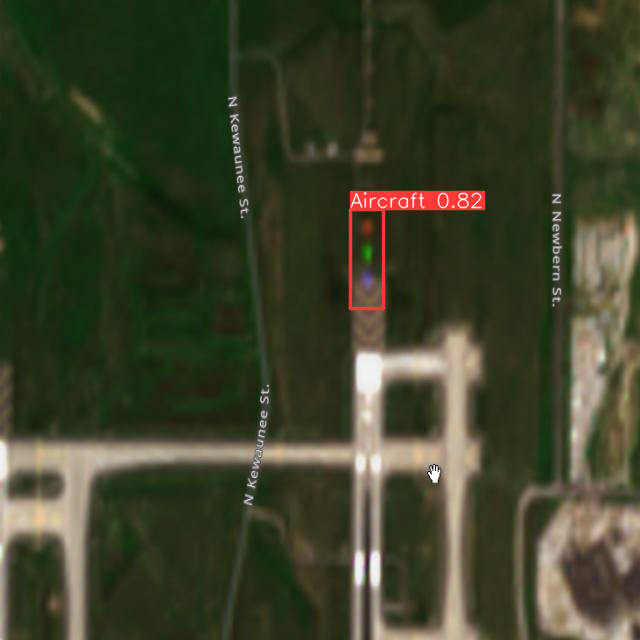

In [27]:
image_data = check[0].plot()[:,:,::-1]
Image.fromarray(image_data)